Kellie Gadeken

### Homework 6: Refine the time-dependent EBM 


**Instructions/to do**
1. Adapt your code from class 8/HW5 (assuming a silicate rock earth) by adding the ability to calculate the surface tempertaure for a single layer grey atmopshere, in addition to the surface temperature for no atmosphere (same as in class 8). The equations needed are shown below in the section on grey atmosphere. Make sure to use the correct epsilon (use your function from Homework 3), so that you find an equilibrium surface temperature of 15C for earth, with an albedo of 0.3 and a solar constant of 1361 $W/m^2$. 
2. Plot both the surface tempertaure for the single-layer grey atmopshere and the no-atmosphere model, again running the code for four start tempertaures until equilibrium (T0=100K, 200K, 300K, 400K).
3. Describe how the final surface temperature and the evolution to that temperature is different when we include a grey atmosphere model compared to no atmosphere. 
4. How would you expect the surface temperature evolution to change if we used a 2 grey-layer atmosphere model instead of the sigle layer model? Describe what you expect to see.

**Graduate students:**

5. Now represent earth's heat capacity as 70% ocean (water) and 30% land (silicate), with a 1000m deep active-layer ocean/land. See section on heat capacity below for how we can do that. Plot the results for both the grey atmopshere and no atmosphere EBM.
6. Describe what you find compared to the silicate rock earth above.



#### Adding back in a single-layer grey atmosphere

We find the following energy balance equation for the Surface tempertaure with a grey atmosphere:

Surface: $C \frac{dT}{dt}= (\pi R_E^2) S_0(1-\alpha)+ 4 \pi R_E^2\epsilon B_1 - 4 \pi R_E^2 B_s$

Atmosphere: $0 = 4 \pi R_E^2 \epsilon B_s - 8 \pi R_E^2\epsilon B_1 $


If we eliminate $B_1$ using $ B_1 = \frac{ B_s}{2}$ and subsitute back in $B_s = \sigma T_s^4$ this gives: 

$C \frac{dT_s}{dt} = (\pi R_E^2) S_0(1-\alpha) + 4 \pi R_E^2 (\frac{\epsilon}{2} -1)\sigma T_s^4 $


Which means:
$ \frac{dT_s}{dt} = \frac{4 \pi  R_E^2}{C}\left(\frac{S_0(1-\alpha)}{4} + (\frac{\epsilon}{2}-1)\sigma T_s^4\right) $

Applying Euler forward to this derivative of $T_s$ and dropping the $_s$ for simplicity (but rememberig we are writting this equation for the surface temterature, we find:

$ T_{i+1} = T_i + \Delta t \frac{4 \pi R_E^2}{C} \left(\frac{S_0(1-\alpha)}{4} + (\frac{\epsilon}{2}-1)\sigma T_i^4 \right)$

A and B are expressions for a collection of constants. $A = \pi R_E^2 $ and  $B = 4\pi R_E^2  \sigma $

$ T_{i+1} = T_i + \Delta t  \left(\frac{A}{C} S_0(1-\alpha) + ( \frac{\epsilon}{2} -1) \frac{B}{C} T_i^4 \right)$

Reminder, without an atmosphere we had:

$ T_{i+1} = T_i + \Delta t\left( \frac{A}{C} S_0 (1-\alpha) - \frac{B}{C} T_i^4 \right)$

Which is what we find for $\epsilon=0$.


#### Changing the heat capacity
For climate change on human timescales, we never get the whole planet to have one temperature through to the core (even if we continue to ignore the interior heating from radioactive decay). Depending on the timescale, we only heat the upper 50-5000 m of the ocean and even less of the land (100m-500m max). And we know that ~70% of the surface of the earth is ocean water and 30% is land, which is predominatly silicate. So let's see how changing from the solid rock/water ball to this assumption changes the results.

As even 5000 m is much smaller than the radius of earth (6371 km), we can approximate the volume of the top 1000 m of earth as the surface of the earth ($4 \pi R_E^2$) times the depth (H) in m. (The actual volume is the difference between the full volume of the earth and the volume of the earth with a radius of (6371km-H), but we don't need to be that precise).


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# constants and other values:

C_si = 712 * 4/3 * np.pi * 6371E3**3 * 2650   # heat capacity for silicate Earth
C_h2o = 4000 * 4/3 * np.pi * 6371E3**3 * 1000  # heat capacity for water Earth
Temp_list = np.array([100,200,300,400])  # units: K
S_0 = 1361
alpha_p = 0.3
radius = 6374*10**3  # units: m
sigma = 5.67E-8    # Stephan Boltzmann constant in W / m^2 / K^4
year = 60*60*24*360  # conversion from year to seconds
end_time = (1000000/2)*year  # half a million years converted into seconds
dt = 1*10**11  # time step in units: seconds
time = np.arange(0,end_time,dt)

K_to_C = 273.15
r_0 = 1 # units: AU

A = np.pi*radius**2
B = 4*np.pi*radius**2*sigma 

In [7]:
def solar(r_0,r_x,S_0):
    S_x = ((r_0**2)/(r_x**2)*S_0)
    return S_x

# calculate epsilon function from observed surface temps
def epsilon(r_0,r_x,S_0,T_s,alpha_p,sigma):
    eps = -((solar(r_0,r_x,S_0)*(1-alpha_p))/((T_s**4)*2*sigma)) + 2
    return eps

eps = epsilon(r_0,1,S_0,15+275.3,alpha_p,sigma)
eps

0.8170811093222576

In [16]:
# function to look at temperature equilibrium and heat capacities

def calculate_temps(dt,C,Temp_list,end_time,time,epsilon):
    #print(len(time))
    t1_list = []
    t2_list = []
    t1_list.append(Temp_list)
    t2_list.append(Temp_list)
    for time in range(len(time)):
        t1 = t1_list[time] + dt*((A/C)*S_0*(1-alpha_p)-(B/C)*(t1_list[time]**4))  # no atmosphere
        t2 = t2_list[time] + dt*((A/C)*S_0*(1-alpha_p)+(epsilon/2 - 1)*(B/C)*(t2_list[time]**4)) # single layer greybody
        t1_list.append(t1)
        t2_list.append(t2)
    return(t1_list,t2_list)


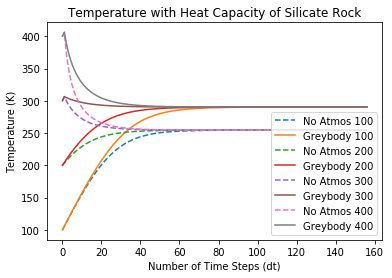

In [19]:

# Silicate Rock
for i in range(len(Temp_list)):
    no_atmos, greybody = calculate_temps(dt,C_si,Temp_list[i],end_time,time,eps) 
    plt.plot(no_atmos,label="No Atmos "+str(Temp_list[i]),linestyle='--')
    plt.plot(greybody,label="Greybody "+str(Temp_list[i]))
    plt.title("Temperature with Heat Capacity of Silicate Rock")
    plt.ylabel('Temperature (K)')
    plt.xlabel('Number of Time Steps (dt)')
    plt.legend()
plt.show()


**Answer to 3.** <br>
When we have a grey body atmosphere, the equilibrium temperature is higher. This is to be expected since having a greybody atmosphere retains more heat than the no atmosphere scenario. 


**Answer to 4.** <br>
I would expect to see the equilibrium temperature go up again for a 2-layer greybody model. This is similar to the n-layer blackbody atmosphere that we calculated earlier. The equilibrium time should remain the same.